In [1]:
import sys
sys.path.append('../Scripts')

# # for reading datafiles 
import pandas as pd
# import script that has many standard functions:
from PostProcessingScripts import * 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


obtain index of the SFRD models that we want to highlight


# Make Figure 2 

In [2]:
def plotRatesMRR_FC(whichRate='intrinsic', ylims=[0,1]):

    f, axe= plt.subplots(ncols=1,nrows=1,figsize=(20,5.5))
    
    nrDATAready = 20
    minRatio_MRR = 100 
    maxRatio_MRR = -100 
    

    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray', 'vi':'orange', 'vii':'orange'}
    List_formationchannelOptions = ['All', 'All MRR', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'vi', 'vii', 'other']
    ind_formationchannelOptions = [7, 8, 1, 2, 3, 4, 5, 6, 0]
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    ind_number_values = int(len(ind_formationchannelOptions)*2)
    
    totalRates__ = np.zeros(20)

    df_name = '/Users/floorbroekgaarden/Projects/GitHub/MRR_Project/dataFiles/rates_MSSFR_Models_BHBH_MRR_FormationChannels.csv'     
    df = pd.read_csv(df_name, index_col=0).T
    
    # loop over channels that we want to plot seperately
    for ind_c, whichChannel in enumerate(['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'vi', 'vii',  'other']):
        # for channel loop over SFRD models S(Z,z) models, old name = MSSFR 
        for ind_L, MSSFRname in enumerate(MSSFRnameslist):
            key_mssfr = MSSFRheaderDict[MSSFRname]  # key in our file 
            rates_L = df[key_mssfr]

            if whichRate =='intrinsic':
                ind_wanted = dictFormationChannelIndex[whichChannel]*2
                rates = rates_L[ind_wanted::18][0:nModels]
                totalrates = rates_L[14::18][0:nModels]
                totalrates_MRR = rates_L[16::18][0:nModels]
#                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate ' ,'=',rates[0]) 

                ylabel = r'$\rm{f}_{\rm{MRR}}^{0}$'



            elif whichRate=='observed':
                ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                rates = rates_L[ind_wanted::18][0:nModels]

                totalrates = rates_L[15::18][0:nModels]
                totalrates_MRR = rates_L[17::18][0:nModels]
                
                if ind_L==0:
                    print('the observed fiducial rate for ' ,'=',rates[0]) 
                ylabel = r'$\rm{f}_{\rm{MRR}}^{\rm{det}}$ '


            ls = '-'
            label=None
            zorder=2
            ALPHA = 0.2 


            ratesRatio = np.asarray(rates)/np.asarray(totalrates)
            ind_color = dictFormationChannelIndex[whichChannel]
            axe.plot(range(len(rates)), ratesRatio, c=channelColorDict[whichChannel], lw=2, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
            axe.scatter(range(len(rates)), ratesRatio, c=channelColorDict[whichChannel], s=50, label=None, zorder=zorder+1, alpha=1, linestyle=ls) #c=BPScolors

            if ind_L==0:
                totalRates__ += np.asarray(rates)/np.asarray(totalrates)

            if ind_c==0:
                ratesRatio = np.asarray(totalrates_MRR)/np.asarray(totalrates)
                axe.plot(range(len(rates)), ratesRatio, c='k', lw=2, label=None, zorder=1E4, alpha=0.9, linestyle='-')
                axe.scatter(range(len(rates)), ratesRatio, c='k', s=50, label=None, zorder=1E4+1, alpha=1, linestyle='-') #c=BPScolors
                
                minRatio_MRR = np.min(np.concatenate((ratesRatio, [minRatio_MRR])))
                maxRatio_MRR = np.max(np.concatenate((ratesRatio, [maxRatio_MRR])))
                if ind_L==0:
                    print('rate:')
                    print(ratesRatio)
                


    print(totalRates__)
    print()

            
            
#       ################      

    minn, maxx = minRatio_MRR, maxRatio_MRR
    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_y = np.linspace(minn,maxx, resN)
    axe.errorbar(x=-0.37, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=6, ecolor='k', elinewidth=3.5)

    textt_min = '{:0.2}'.format(minn/1.)
    textt_max = '{:0.2}'.format(maxx/1.)
    textt_min = r'$%s$'%textt_min #r'$\rm{min} =  %s$'%textt_min
    textt_max = r'$%s$'%textt_max #r'$\rm{max} =  %s$'%textt_max
    axe.text(-0.67, minn*0.92, s=textt_min, rotation = 0, fontsize = fs-6, color = 'k', ha = 'left', va='top')#,transform=axe.transAxes)#, weight = 'bold')
    axe.text(-0.67, maxx*(1./0.98), s=textt_max, rotation = 0, fontsize = fs-6, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')

    
    xmin = -1. #-0.6
    xmax = nrDATAready -0.5 # change to len(df.T)
    xx = np.linspace(xmin,xmax,15)


    for ll in [0.2, 0.4, 0.6, 0.8, 1]:
        axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
    axe.set_ylim(ylims[0], ylims[1] )

    xlabel = r'\textbf{binary population synthesis model}'


    axe.set_xlim(xmin, xmax)
    axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=fs+8)

    
    ##### PHYSICAL NAMES 
    physicalnames = []
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(r'\textbf{%s}'%(bps_model) )
    axe.set_xticks(range(nModels))
    axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

    ##### SECOND AXIS ######
    physicalnames=[]
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
    ax2y = axe.twiny()
    ax2y.set_xlim(xmin, xmax)
    ax2y.set_xticks(range(nModels))
    ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30)#, orientation=30)    


    axe.set_ylim(ylims[0], ylims[1])


    x__ = -100*np.ones(5)
    channelLabels = [r'$\textbf{MRR: Classic common envelope}$', r'$\textbf{MRR: Only stable mass transfer}$', r'$\textbf{MRR: Other}$']
    axe.plot(x__,x__ , lw=15, color='k', label = r'$\textbf{MRR}$')
    for ind_c, channel in enumerate([ 'classic', 'stable B no CEE',  'other']):
        axe.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = channelLabels[ind_c])


    lgd = f.legend(fontsize=fs-1, ncol=4,bbox_to_anchor=(1, 1.12)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    

    plt.grid(True)
    plt.tight_layout()
    
    plt.savefig('./Rate_MRR_formationChannel_' +whichRate + '.png', dpi=600, transparent=False, bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.savefig('./Rate_MRR_formationChannel_' +whichRate + '.pdf', transparent=False, bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center') 
    
    plt.show()
    plt.close()

    return




the intrinsic fiducial rate  = 1.245549831450366
rate:
[0.4777763  0.32656596 0.42618208 0.48242033 0.47126591 0.63487688
 0.71811749 0.51450342 0.36928243 0.5177386  0.64009798 0.53426355
 0.40335608 0.52867611 0.48444614 0.42703225 0.48167615 0.57595677
 0.64428832 0.25551465]
the intrinsic fiducial rate  = 13.949641923637431
the intrinsic fiducial rate  = 7.796414569024685e-11
the intrinsic fiducial rate  = 0.041735518975032006
the intrinsic fiducial rate  = 0.0
the intrinsic fiducial rate  = 0.7383740891292971
the intrinsic fiducial rate  = 0.0400017083943489
[0.4777763  0.32656596 0.42618208 0.48242033 0.47126591 0.63487688
 0.71811749 0.51450342 0.36928243 0.5177386  0.64009798 0.53426355
 0.40335608 0.52867611 0.48444614 0.42703225 0.48167615 0.57595677
 0.64428832 0.25551465]



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later


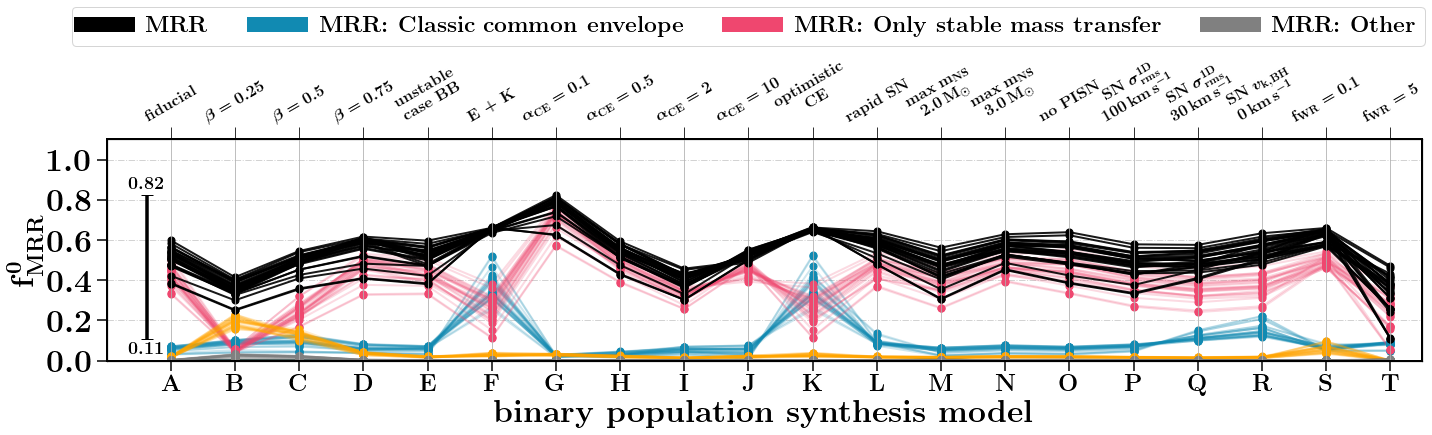

In [3]:
# CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0,1.1]
plotRatesMRR_FC(whichRate='intrinsic', ylims=ylims) #, CSVdir=CSVdir)

the observed fiducial rate for  = 19.964526693114397
rate:
[0.78531092 0.56044433 0.68246765 0.76698041 0.78528805 0.83014186
 0.91596961 0.82436286 0.71295053 0.88830602 0.82898485 0.78139826
 0.77643177 0.7932327  0.80954731 0.79672606 0.80564354 0.81525293
 0.83235528 0.59884096]
the observed fiducial rate for  = 186.2306933243744
the observed fiducial rate for  = 0.0034256624880866
the observed fiducial rate for  = 0.0128087737231007
the observed fiducial rate for  = 0.0
the observed fiducial rate for  = 12.247823168924345
the observed fiducial rate for  = 0.5454752597544823
[0.78531092 0.56044433 0.68246765 0.76698041 0.78528805 0.83014186
 0.91596961 0.82436286 0.71295053 0.88830602 0.82898485 0.78139826
 0.77643177 0.7932327  0.80954731 0.79672606 0.80564354 0.81525293
 0.83235528 0.59884096]



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later


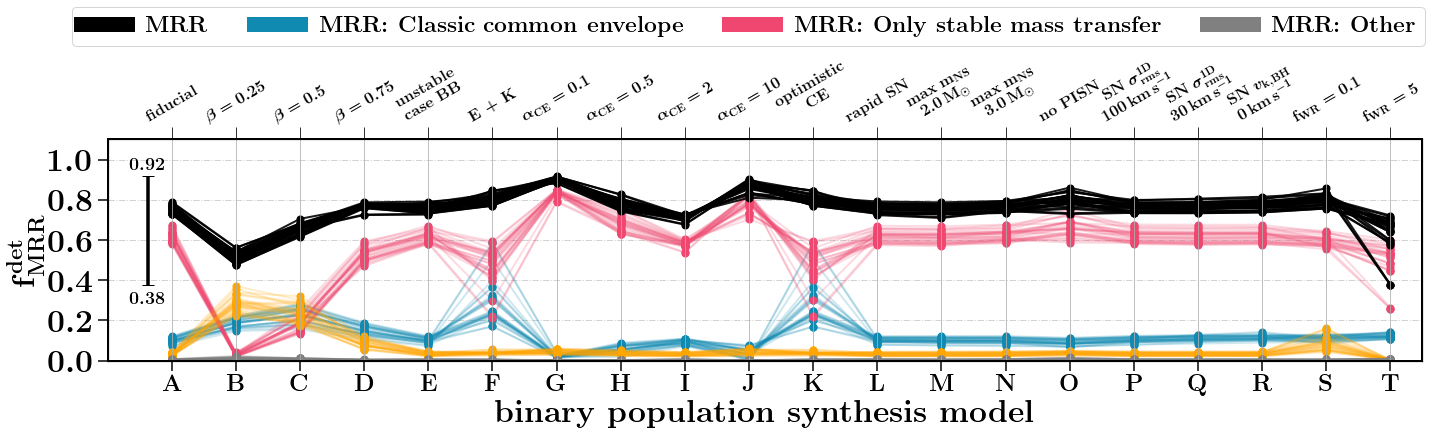

In [4]:
# CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0,1.1]
plotRatesMRR_FC(whichRate='observed', ylims=ylims) #, CSVdir=CSVdir)

# Additional Figures

# Other versions of this plot 


the observed fiducial rate for  BBH = 19.961744002812942
the observed fiducial rate for  BBH = 186.22774760430602
the observed fiducial rate for  BBH = 0.0034256624880866
the observed fiducial rate for  BBH = 0.0128087737231007
the observed fiducial rate for  BBH = 12.799026839048626


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:184: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:186: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later


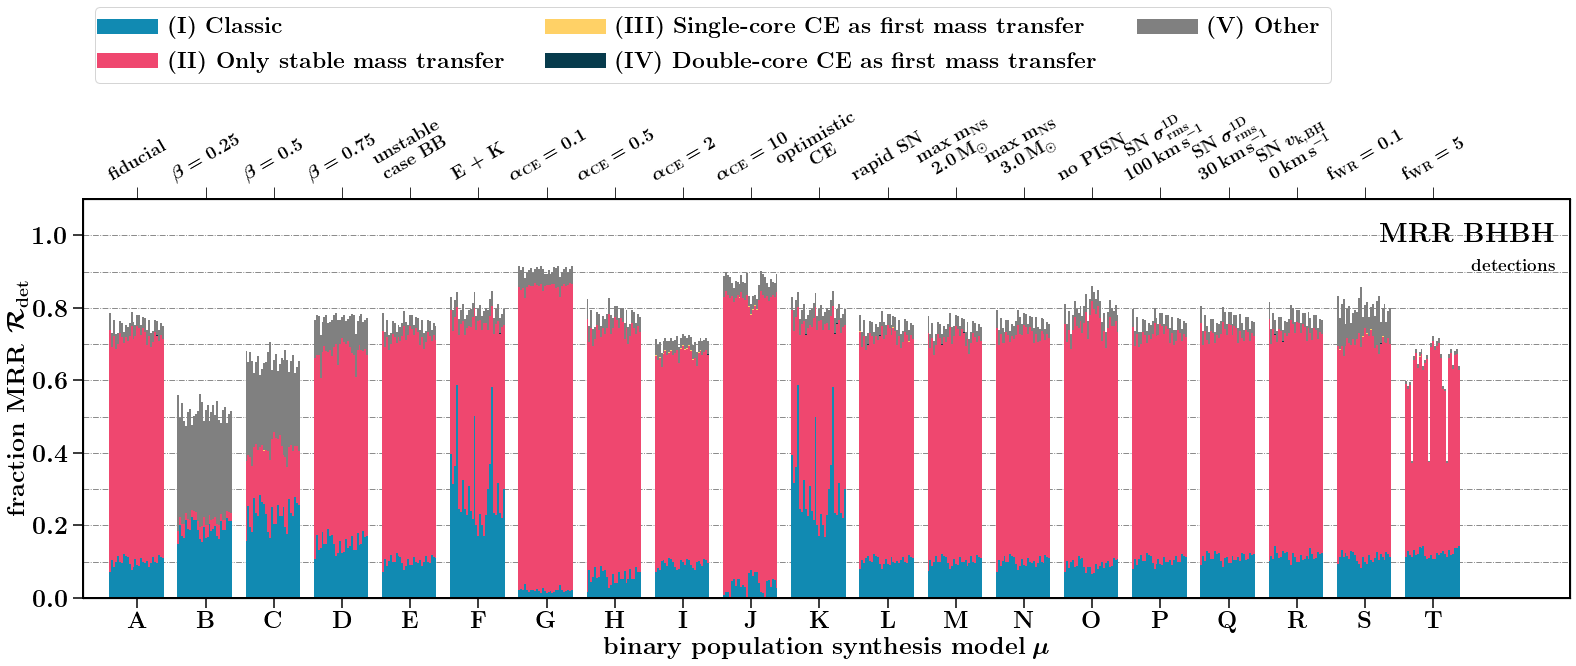

In [5]:
def plotFormationChannelRates_vbars(whichRate='intrinsic', CSVdir='name'):
    
    """
    parameters
    
    """
    
    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(22,8), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    # channel colors 
    
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    List_formationchannelOptions = ['All', 'All MRR', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']
    ind_formationchannelOptions = [0,1,2,3,4,5,6]
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    
    dx = 0.4 #0.3
    dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) #+ ind_m
    dxlen = (2*dx)/len(MSSFRnameslist)
    

    for ind_t, DCOtype in enumerate(['BBH']):
        print()
        axe = axes #[ind_t]
        DCOname = DCOname_dict[DCOtype]
        
        
#         stringgg =  'formation_channels'
#         csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/Formation_yields_'  + stringgg + '_'  + DCOname + 'fast.csv'     
        csvPath = CSVdir  

        df_name = csvPath
        df = pd.read_csv(df_name, index_col=0).T

        for ind_L, MSSFRname in enumerate(MSSFRnameslist):
            ratesRatio_low = np.zeros(nModels)
            ratesRatio     = np.zeros(nModels)
            

            x_positions_ = range(nModels)
            xx_ = dxrange[ind_L]
            x_positions = np.asarray(x_positions_) + xx_

                
            key_mssfr = MSSFRheaderDict[MSSFRname]
            rates_L = df[key_mssfr]
            
            if MSSFRname=='231':
                zorder=10
                label=MSSFRnameslist[ind_L] 
                ls = MSSFRlinestyles[1]
                ALPHA=1
            elif MSSFRname=='312':
                zorder=10
                label=MSSFRnameslist[ind_L]
                ls = MSSFRlinestyles[2]
                ALPHA=1
            else:
                zorder=2
                label=None    
                ls = MSSFRlinestyles[0]
                ALPHA=0.1
                
            for ind_c, whichChannel in enumerate(['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']):

                if whichRate =='intrinsic':
                    ind_wanted = dictFormationChannelIndex[whichChannel]*2
                    rates = rates_L[ind_wanted::14][0:nModels]
                    totalrates = rates_L[0::14][0:nModels]
                    totalrates_MRR = rates_L[2::14][0:nModels]
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'\textbf{fraction MRR} $\,\mathcal{R}_{\rm{m}}^{{0}}$'



                elif whichRate=='observed':
                    ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                    rates = rates_L[ind_wanted::14][0:nModels]
                    totalrates = rates_L[1::14][0:nModels]
                    totalrates_MRR = rates_L[3::14][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0])   
                    ylabel = r'\textbf{fraction MRR} $\, \mathcal{R}_{\rm{det}}$'



                
                ratesRatio += np.asarray(rates)/np.asarray(totalrates)
#                 ratesRatio += np.asarray(rates)/np.asarray(totalrates)

                axe.bar(x_positions, height=(ratesRatio-ratesRatio_low),  bottom=ratesRatio_low, color=channelColorDict[whichChannel], alpha=1, \
                       width=dxlen, zorder=100)
                
                ratesRatio_low += np.asarray(rates)/np.asarray(totalrates)
                



        xmin = -0.8
        xmax = nModels +1. # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)


        for ll in [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
            axe.plot(xx, ll*np.ones_like(xx), c='gray', linestyle='dashdot', lw=0.9, zorder=0)
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )



#       # make up axes
        if ind_t ==0:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '

        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)


        # set physical labels on bottom
        if ind_t==0:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            ind_label = dictFormationChannelIndex[whichChannel]-1
        else:
            axe.set_xticks([])
            axe.set_xticklabels( () )
            
        # add name of DCO type
        axe.text(0.99, 0.94, r'\textbf{MRR %s}'%TypesLabels[ind_t] , rotation = 0, fontsize = fs+3, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')
        axe.text(0.99, 0.85, r'\textbf{detections}' , rotation = 0, fontsize = 17, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')




        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-6, rotation=30)#, orientation=30)    
     

    
    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate([ 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
        plt.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[ind_c])
    
    
    lgd = f.legend(fontsize=fs-1, ncol=3,bbox_to_anchor=(.85, 1.17)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    
#     draw_arrows(axes=axes)
    


    
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.11)#2)
    plt.savefig('./MRR_' + whichRate  + '_vbars.pdf', transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.savefig('./MRR_' + whichRate  + '_vbars.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.show()
    plt.close()
    print()
    
    return

nModels=20








# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
# CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/lightestBHformsFirst/rates_MSSFR_Models_BHBH_MRR_FormationChannels.csv'   
ylims =[[0,1.1],[0,1.1],[0,1.1]]
plotFormationChannelRates_vbars(whichRate='observed', CSVdir=CSVdir)


## Some spin plots, see also Figure 4 and 5

In [6]:
def plotRatesMRR_spins(whichRate='intrinsic', ylims=[0,1]):
    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(15,5.5), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    NSBHColour =  'blueviolet'
    nModels=20
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    minRatio_MRR = 100 
    maxRatio_MRR = -100 
    
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
    channelColorDict = {'LVKM1 spinning':'mediumseagreen', 'LVKM2 spinning':'crimson'}
    List_formationchannelOptions = ['All', 'All one spinning', 'LVKM1 spinning',  'LVKM2 spinning']
    ind_formationchannelOptions = [0,1,2,3]
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    
    iii=0
    namesEMlist =['BHNS', 'NSBH']
    totalRates__ = np.zeros(20)
    ind_t = 1

    
    csvPath = '/Users/floorbroekgaarden/Projects/GitHub/MRR_Project/dataFiles/rates_MSSFR_Models_BHBH_MRR_Spins.csv'     
    df = pd.read_csv(csvPath, index_col=0).T
    
    for ind_c, whichSpin in enumerate(['LVKM1 spinning',  'LVKM2 spinning']):

        for ind_L, MSSFRname in enumerate(MSSFRnameslist):

            key_mssfr = MSSFRheaderDict[MSSFRname]
            rates_L = df[key_mssfr]
            if whichRate =='intrinsic':
                ind_wanted = dictFormationChannelIndex[whichSpin]*2
                rates = rates_L[ind_wanted::8][0:nModels]
                totalrates = rates_L[0::8][0:nModels]
                totalrates_spin = rates_L[2::8][0:nModels]
#                 if ind_L==0:
#                     print('the intrinsic fiducial rate ' ,'=',rates[0]) 
                ylabel = r'$\rm{f}_{\rm{spinning BH}}^{0}$'
                
            elif whichRate=='observed':
                ind_wanted = (dictFormationChannelIndex[whichSpin]*2) +1
                rates = rates_L[ind_wanted::8][0:nModels]
                totalrates = rates_L[1::8][0:nModels]
                totalrates_spin = rates_L[3::8][0:nModels]
#                 if ind_L==0:
#                     print('the observed fiducial rate for ' ,'=',rates[0]) 
                ylabel = r'$\rm{f}_{\rm{spinning BH}}^{\rm{det}}$ '


            ls = '-'
            label=None
            zorder=2
            ALPHA = 0.2 



            ratesRatio = np.asarray(rates)/np.asarray(totalrates)
#             ind_color = dictFormationChannelIndex[whichSpin]
#             axe.plot(range(len(rates)), ratesRatio, c=channelColorDict[whichSpin], lw=2, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
            if whichSpin=='LVKM1 spinning':
                axe.scatter(range(len(rates)), ratesRatio, c=channelColorDict[whichSpin], s=50, label=None, zorder=zorder+1, alpha=1, linestyle=ls) #c=BPScolors
            elif whichSpin=='LVKM2 spinning':
                axe.scatter(np.asarray(range(len(rates)))+0.2, ratesRatio, c=channelColorDict[whichSpin], s=50, label=None, zorder=zorder+1, alpha=1, linestyle=ls) #c=BPScolors

                
            if ind_L==0:
                totalRates__ += np.asarray(rates)/np.asarray(totalrates)

            if ind_c==0:
                ratesRatio = np.asarray(totalrates_spin)/np.asarray(totalrates)
#                 axe.plot(range(len(rates)), ratesRatio, c='darkgray', lw=2, label=None, zorder=1, alpha=1, linestyle='-')
                axe.scatter(np.asarray(range(len(rates)))-0.2, ratesRatio, c='k', s=50, label=None, zorder=1, alpha=1, linestyle='-') #c=BPScolors
                
                minRatio_MRR = np.min(np.concatenate((ratesRatio, [minRatio_MRR])))
                maxRatio_MRR = np.max(np.concatenate((ratesRatio, [maxRatio_MRR])))
#                 if ind_L==0:
#                     print('rate:')
#                     print(ratesRatio)
                


    minn, maxx = minRatio_MRR, maxRatio_MRR
    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_y = np.linspace(minn,maxx, resN)
    axe.errorbar(x=-0.37, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)

    textt_min = '{:0.2}'.format(minn/1.)
    textt_max = '{:0.2}'.format(maxx/1.)
    textt_min = r'$\rm{min} =  %s$'%textt_min
    textt_max = r'$\rm{max} =  %s$'%textt_max

    axe.text(-0.67, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')


    
    xmin = -1. #-0.6
    xmax = nModels -0.5 # change to len(df.T)
    xx = np.linspace(xmin,xmax,15)


    for ll in [0.1, 0.2, 0.3, 0.4, 0.5]:
        axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
    axe.set_ylim(ylims[0], ylims[1] )

    
    # make up axes
    if ind_t ==1:
        xlabel = r'\textbf{binary population synthesis model} $\mu$'
    else:
        xlabel=r'  $\_$ '

    axe.set_xlim(xmin, xmax)
    axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=20)
#     axe.set_yscale('log')


    
    ##### PHYSICAL NAMES 
    physicalnames = []
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(r'\textbf{%s}'%(bps_model) )
    axe.set_xticks(range(nModels))
    axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

    ##### SECOND AXIS ######
    physicalnames=[]
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
    ax2y = axe.twiny()
    ax2y.set_xlim(xmin, xmax)

    ax2y.set_xticks(range(nModels))
    ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30)#, orientation=30)    


    axe.set_ylim(ylims[0], ylims[1])


    plt.grid(True)
    plt.tight_layout()
    plt.savefig('./Rate_MRR_spins_' +whichRate + '_summary.png', dpi=600, transparent=False)
    plt.savefig('./Rate_MRR_spins_' +whichRate + '_summary.pdf', transparent=False) 
    
    plt.show()
    plt.close()

    return




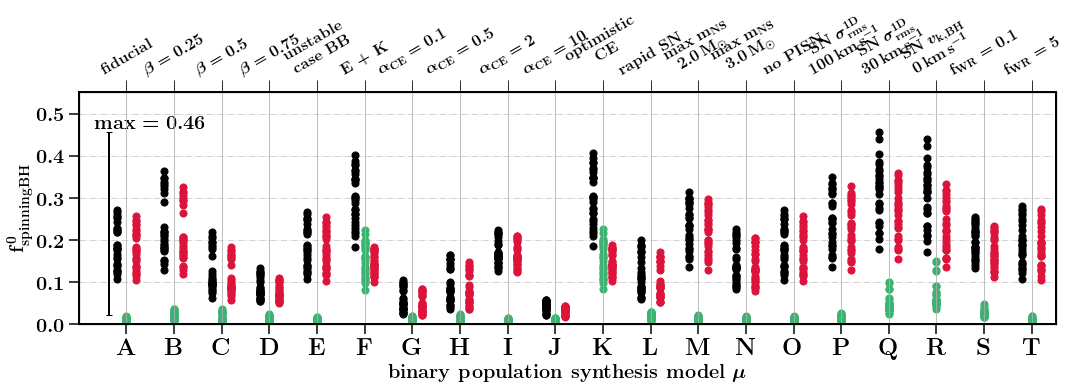

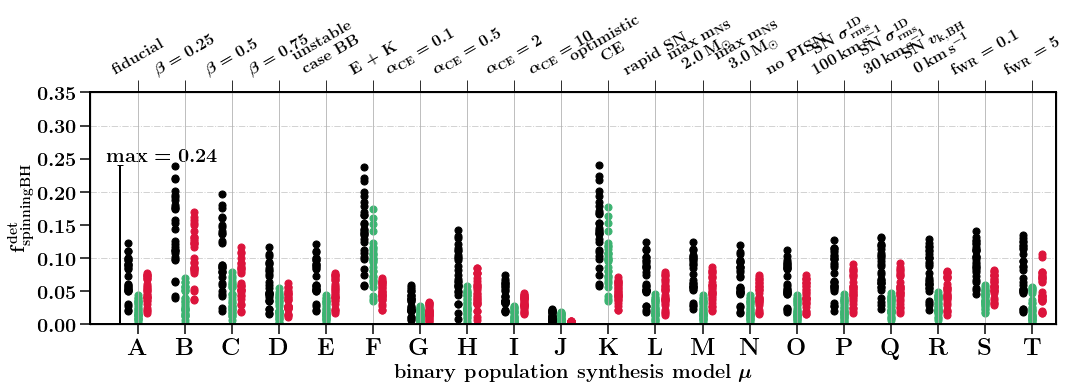

In [7]:
# CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0,.55]
plotRatesMRR_spins(whichRate='intrinsic', ylims=ylims) #, CSVdir=CSVdir)



# CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0,.35]
plotRatesMRR_spins(whichRate='observed', ylims=ylims) #, CSVdir=CSVdir)

In [8]:
def plotMRRSpinsRates_vbars(whichRate='intrinsic', CSVdir='name'):
    
    """
    parameters
    
    """
    
    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(22,8), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    # channel colors 
    
    # channel colors 
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
    channelColorDict = {'LVKM1 spinning':'blue', 'LVKM2 spinning':'orange'}
    List_formationchannelOptions = ['All', 'All one spinning', 'LVKM1 spinning',  'LVKM2 spinning']
    ind_formationchannelOptions = [0,1,2,3]
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    dictChannelsBHNSListBolt = [r'$ \chi_{\rm{BH,1}} > 0.05 \textbf{(LVK M1)}$', r'$ \chi_{\rm{BH,2}} > 0.05 \textbf{(LVK M2)}$']
    
    dx = 0.4 #0.3
    dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) #+ ind_m
    dxlen = (2*dx)/len(MSSFRnameslist)
    

    for ind_t, DCOtype in enumerate(['BBH']):
        print()
        axe = axes #[ind_t]
        DCOname = DCOname_dict[DCOtype]
        
        
#         stringgg =  'formation_channels'
#         csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/Formation_yields_'  + stringgg + '_'  + DCOname + 'fast.csv'     
        csvPath = CSVdir  

        df_name = csvPath
        df = pd.read_csv(df_name, index_col=0).T

        for ind_L, MSSFRname in enumerate(MSSFRnameslist):
            ratesRatio_low = np.zeros(nModels)
            ratesRatio     = np.zeros(nModels)
            

            x_positions_ = range(nModels)
            xx_ = dxrange[ind_L]
            x_positions = np.asarray(x_positions_) + xx_

                
            key_mssfr = MSSFRheaderDict[MSSFRname]
            rates_L = df[key_mssfr]
            
            if MSSFRname=='231':
                zorder=10
                label=MSSFRnameslist[ind_L] 
                ls = MSSFRlinestyles[1]
                ALPHA=1
            elif MSSFRname=='312':
                zorder=10
                label=MSSFRnameslist[ind_L]
                ls = MSSFRlinestyles[2]
                ALPHA=1
            else:
                zorder=2
                label=None    
                ls = MSSFRlinestyles[0]
                ALPHA=0.1
                
            for ind_c, whichSpin in enumerate(['LVKM1 spinning',  'LVKM2 spinning']):

                if whichRate =='intrinsic':
                    ind_wanted = dictFormationChannelIndex[whichSpin]*2
                    rates = rates_L[ind_wanted::8][0:nModels]
                    totalrates = rates_L[0::8][0:nModels]
                    totalrates_MRR = rates_L[2::8][0:nModels]
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'\textbf{fraction spinning BH} $\,\mathcal{R}_{\rm{m}}^{{0}}$'



                elif whichRate=='observed':
                    ind_wanted = (dictFormationChannelIndex[whichSpin]*2) +1
                    rates = rates_L[ind_wanted::8][0:nModels]
                    totalrates = rates_L[1::8][0:nModels]
                    totalrates_MRR = rates_L[3::8][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0])   
                    ylabel = r'\textbf{fraction spinning BH} $\, \mathcal{R}_{\rm{det}}$'



                
                ratesRatio += np.asarray(rates)/np.asarray(totalrates)
#                 ratesRatio += np.asarray(rates)/np.asarray(totalrates)

                axe.bar(x_positions, height=(ratesRatio-ratesRatio_low),  bottom=ratesRatio_low, color=channelColorDict[whichSpin], alpha=1, \
                       width=dxlen, zorder=100)
                
                ratesRatio_low += np.asarray(rates)/np.asarray(totalrates)
                



        xmin = -0.8
        xmax = nModels +1. # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)


        for ll in [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
            axe.plot(xx, ll*np.ones_like(xx), c='gray', linestyle='dashdot', lw=0.9, zorder=0)
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )



#       # make up axes
        if ind_t ==0:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '

        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)


        # set physical labels on bottom
        if ind_t==0:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            ind_label = dictFormationChannelIndex[whichSpin]-1
        else:
            axe.set_xticks([])
            axe.set_xticklabels( () )
            
        # add name of DCO type
        axe.text(0.99, 0.94, r'\textbf{%s with spinning BH}'%TypesLabels[ind_t] , rotation = 0, fontsize = fs+3, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')
        axe.text(0.99, 0.85, r'\textbf{detections}' , rotation = 0, fontsize = 17, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')




        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-6, rotation=30)#, orientation=30)    
     

    
    x__ = -100*np.ones(5)
    for ind_c, channel  in enumerate(['LVKM1 spinning',  'LVKM2 spinning']):
        plt.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[ind_c])
    
    
    lgd = f.legend(fontsize=fs-1, ncol=3,bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    
#     draw_arrows(axes=axes)
    


    
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.11)#2)
    plt.savefig('./MRR_spins' + whichRate  + '_vbars.pdf', transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.savefig('./MRR_spins' + whichRate  + '_vbars.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.show()
    plt.close()
    print()
    
    return

nModels=20







the observed fiducial rate for  BBH = 0.1096147360143534
the observed fiducial rate for  BBH = 5.036314520201074


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:186: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:188: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later


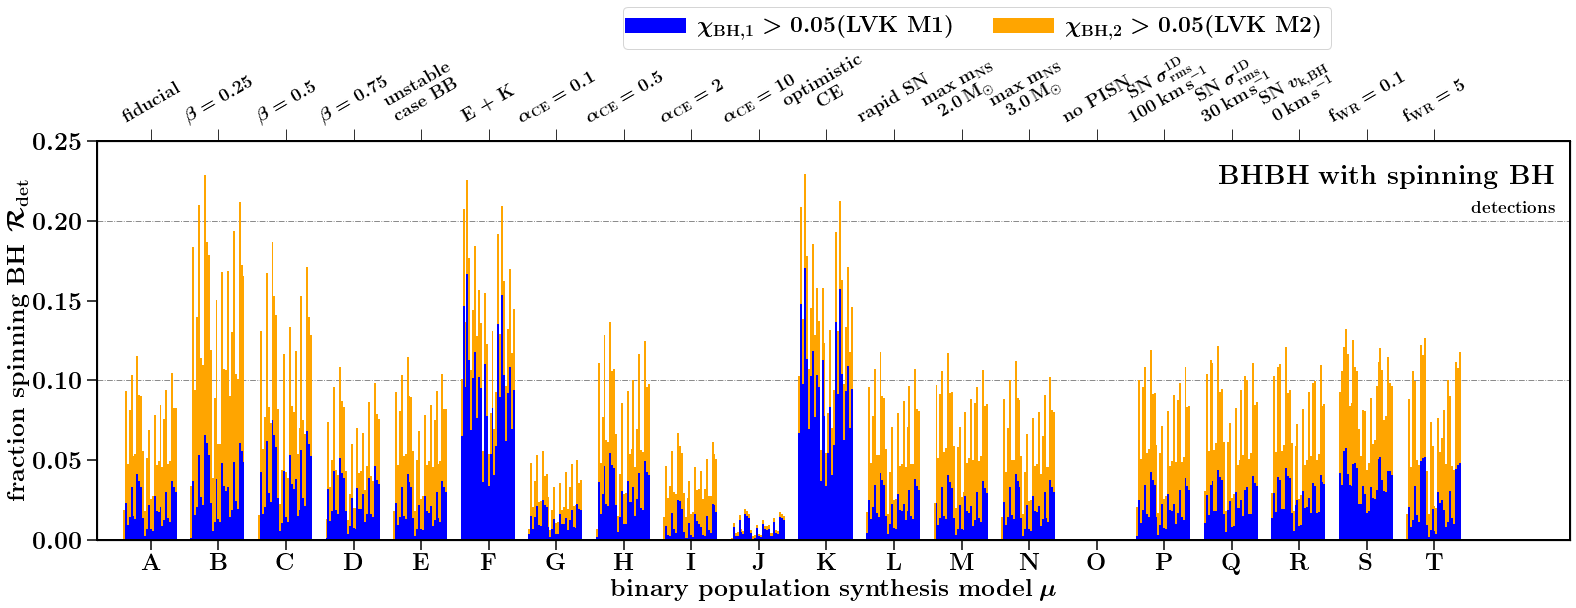

In [9]:
# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
# CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/lightestBHformsFirst/rates_MSSFR_Models_BHBH_MRR_Spins.csv'  
ylims =[[0,0.25],[0,1.1],[0,1.1]]
plotMRRSpinsRates_vbars(whichRate='observed', CSVdir=CSVdir)
